# What is the likelihood of an active employee leaving the company? if a good employee leaves, the chances of finding a good successor diminishes and that impacts the organisation overall

-What are the key indicators of an employee leaving the company?
-What other variables could be tested to plot a nine Grid succession planning grid?
-What strategies can be adopted based on the results to attarct and retain talent so that they can be potential successors?

- Given that we have data on former employees, this is a standard supervised classification problem where the label is a binary variable, 0 (active employee), 1 (former employee). In this study, our target variable Y is the probability of an employee leaving the company.
- We could also use some other variable as a different use case altogether like "Performance Rating" to preict the most important features and organisation should keep in mind while developing the talent

# Data Definition

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [235]:
# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
import plotly
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score
# importing misceallenous libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse

In [236]:
df = pd.read_csv('Train_Data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [237]:
#Looking for missing data and then handling it accordingly
def find_missing(data):
    # number of missing values
    count_missing = df.isnull().sum().values
    # total records
    total = df.shape[0]
    # percentage of missing
    ratio_missing = count_missing/total
    # return a dataframe to show: feature name, # of missing and % of missing
    return pd.DataFrame(data={'missing_count':count_missing, 'missing_ratio':ratio_missing}, index=data.columns.values)
find_missing(df).head(12)

,missing_count,missing_ratio
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


No missing values can be seen from above

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [239]:
continuous_vars = df.describe().columns
categorical_vars = df.describe(include=["object"]).columns
print(categorical_vars)
print(continuous_vars)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


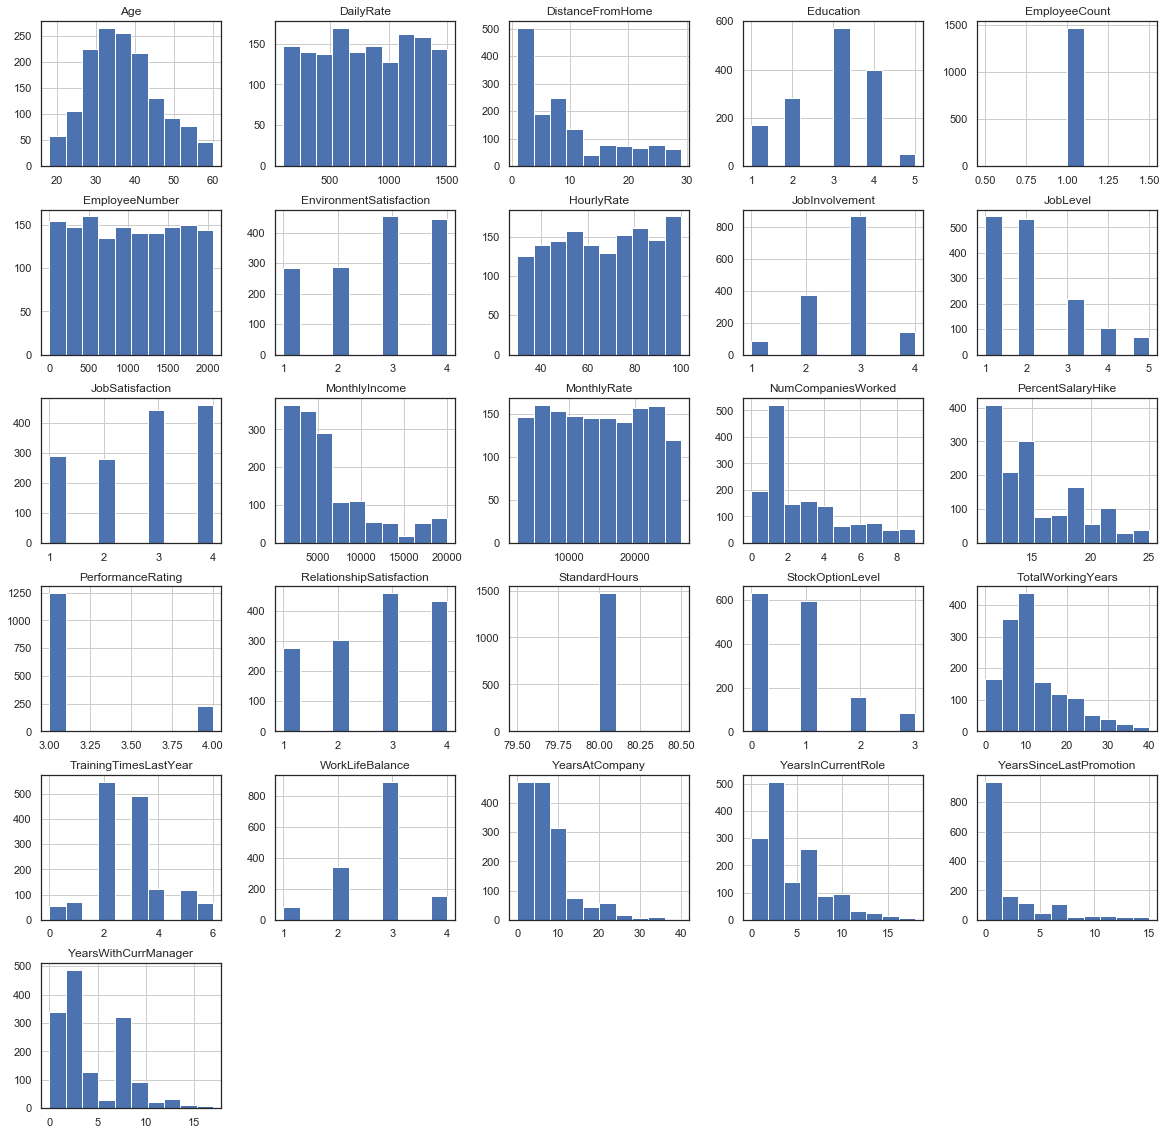

In [240]:
# lets check through histogram how the continous variables are distributed
df.hist(figsize=(20,20))
plt.show()

A few observations can be made based on the information and histograms for numerical features:

Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.
Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.
EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.
Employee Number is likely to be a unique identifier for employees given the feature's quasi-uniform distribution

In [241]:
# run the descriptive stats and see if there are any outliers
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


some observations from the descriptive stats
The average :
1. Age is 37 years
2. Years with current manager = 4
3. Year since last promotion = 2
4. Years at company are 7
5. working hours are 11
6. salary hike is 15%
7. number of companies an employee has worked at are 3
8. medium level of job satisfaction at the employee level

        **we will look into some of them in detail duing our analysis

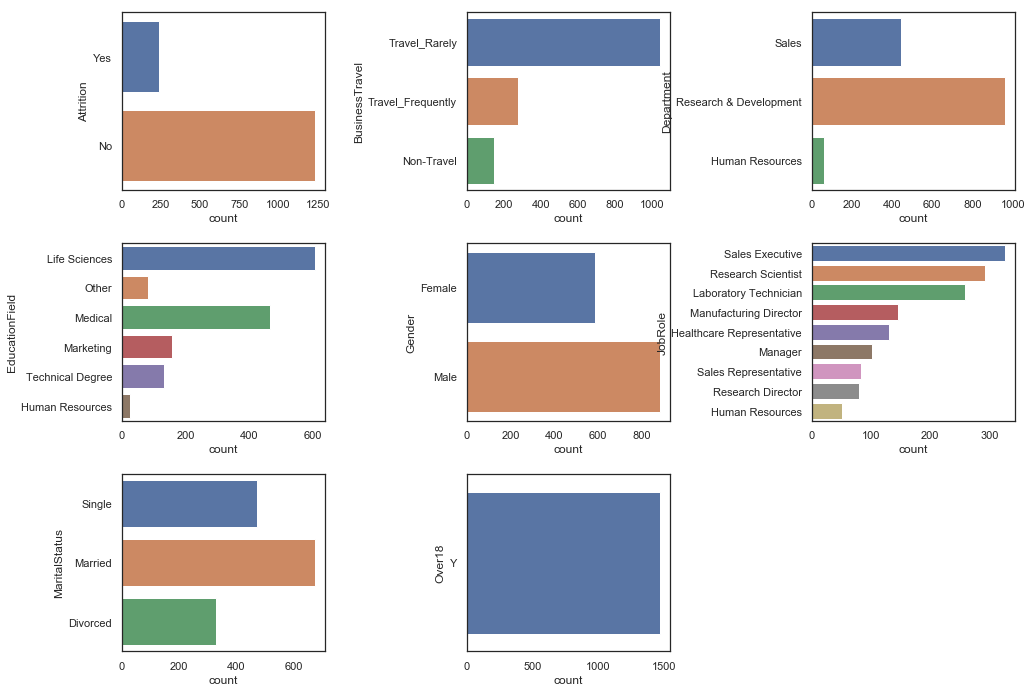

In [242]:
# Plotting count plot for categorical vars
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 7:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df, ax=ax)

### Exploratory Data Analysis stage

In [243]:
# This is to create each of the categories.
lst = [df]
for column in lst:
    column.loc[column["Age"] < 30,  "age_category"] = "In their 20s"
    column.loc[(column["Age"] >= 30) & (column["Age"] <= 39), "age_category"] = "In their 30s"
    column.loc[(column["Age"] >= 40) & (column["Age"] <= 49), "age_category"] = "In their 40s"
    column.loc[(column["Age"] >= 50) & (column["Age"] <= 59), "age_category"] = "In their 50s"
    column.loc[column["Age"] >= 60, "age_category"] = "In their 60s"

age_category  In their 20s  In their 30s  In their 40s  In their 50s  \
Attrition                                                              
No                72.08589     85.691318      90.25788     86.309524   
Yes               27.91411     14.308682       9.74212     13.690476   

age_category  In their 60s  
Attrition                   
No                   100.0  
Yes                    0.0  


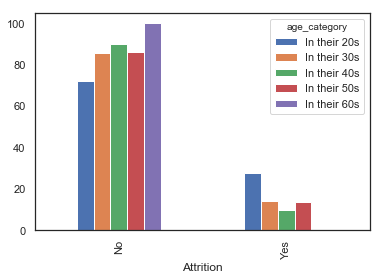

In [244]:
# Liklehood that each age bucket could get a term deposit.
age_attr_rel = pd.crosstab(df['Attrition'], df['age_category']).apply(lambda x: x/x.sum() * 100)
age_attr_rel.plot(kind= 'bar')
print(age_attr_rel)

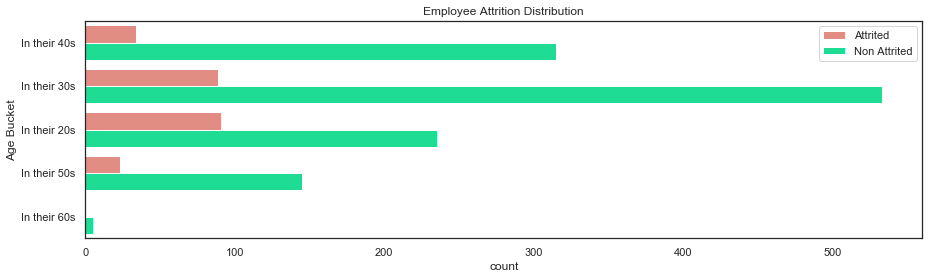

In [245]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(15, 4))
colors = ["#F08075", "#00FB9B"]
labels = ['No Attrition', 'Attrition']
sns.countplot(y="age_category", hue='Attrition', data=df, palette=colors).set_title('Employee Attrition Distribution')
ax.set_ylabel("Age Bucket")
legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Attrited')
legend_name.get_texts()[1].set_text('Non Attrited')

In [246]:
# gender level 
# Gender of employees
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [247]:
# Leavers by Gender
Gender_attr_rel = pd.crosstab(df['Attrition'], df['Gender']).apply(lambda x: x/x.sum() * 100)
Gender_attr_rel

Gender,Female,Male
Attrition,,
No,85.204082,82.993197
Yes,14.795918,17.006803


14.8 % females and 17% males have attrited as per the data 

MaritalStatus   Divorced    Married     Single
Attrition                                     
No             89.908257  87.518574  74.468085
Yes            10.091743  12.481426  25.531915


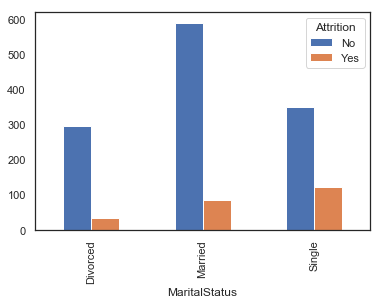

In [248]:
# Leavers by Marital Status
Marital_attr_rel = pd.crosstab(df['Attrition'], df['MaritalStatus']).apply(lambda x: x/x.sum() * 100)
temp1.plot(kind='bar').plot(kind='bar')
print(Marital_attr_rel)

MaritalStatus
Divorced    22.244898
Married     45.782313
Single      31.972789
dtype: float64


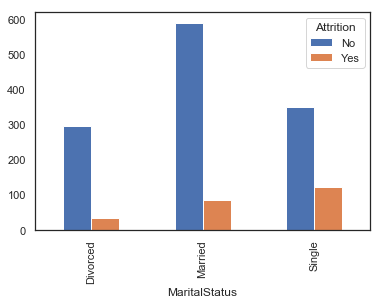

In [249]:
temp1 = pd.crosstab(df['MaritalStatus'], df['Attrition'])
temp1.plot(kind='bar')
print(df.groupby(['MaritalStatus']).size()/len(df)*100)

Education
1    11.564626
2    19.183673
3    38.911565
4    27.074830
5     3.265306
dtype: float64


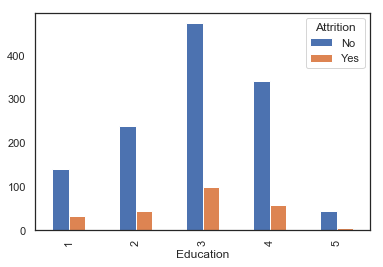

In [250]:
#Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'
temp11 = pd.crosstab(df['Education'], df['Attrition'])
temp11.plot(kind='bar')
print(df.groupby(['Education']).size()/len(df)*100)

DistanceFromHome
1     14.149660
2     14.353741
3      5.714286
4      4.353741
5      4.421769
6      4.013605
7      5.714286
8      5.442177
9      5.782313
10     5.850340
11     1.972789
12     1.360544
13     1.292517
14     1.428571
15     1.768707
16     2.176871
17     1.360544
18     1.768707
19     1.496599
20     1.700680
21     1.224490
22     1.292517
23     1.836735
24     1.904762
25     1.700680
26     1.700680
27     0.816327
28     1.564626
29     1.836735
dtype: float64


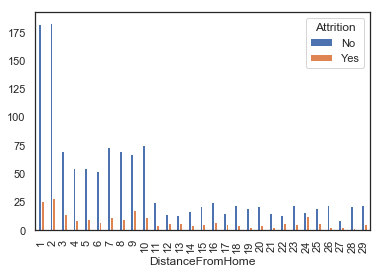

In [251]:
temp2 = pd.crosstab(df['DistanceFromHome'], df['Attrition'])
temp2.plot(kind='bar')
print(df.groupby(['DistanceFromHome']).size()/len(df)*100)

Department
Human Resources            4.285714
Research & Development    65.374150
Sales                     30.340136
dtype: float64


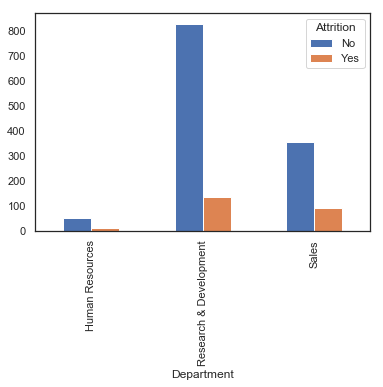

In [252]:
temp3 = pd.crosstab(df['Department'], df['Attrition'])
temp3.plot(kind='bar')
print(df.groupby(['Department']).size()/len(df)*100)

JobRole
Healthcare Representative     8.911565
Human Resources               3.537415
Laboratory Technician        17.619048
Manager                       6.938776
Manufacturing Director        9.863946
Research Director             5.442177
Research Scientist           19.863946
Sales Executive              22.176871
Sales Representative          5.646259
dtype: float64


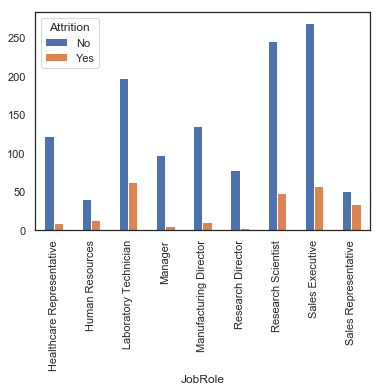

In [253]:
temp4 = pd.crosstab(df['JobRole'], df['Attrition'])
temp4.plot(kind='bar')
print(df.groupby(['JobRole']).size()/len(df)*100)

JobLevel
1    36.938776
2    36.326531
3    14.829932
4     7.210884
5     4.693878
dtype: float64


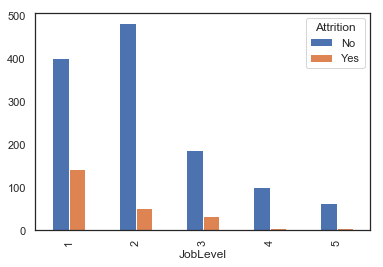

In [254]:
temp5 = pd.crosstab(df['JobLevel'], df['Attrition'])
temp5.plot(kind='bar')
print(df.groupby(['JobLevel']).size()/len(df)*100)

OverTime
No     71.70068
Yes    28.29932
dtype: float64


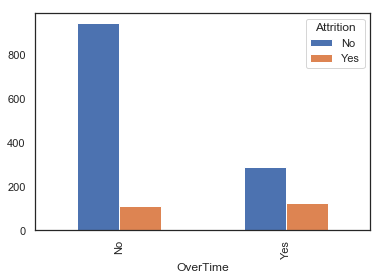

In [255]:
temp7 = pd.crosstab(df['OverTime'], df['Attrition'])
temp7.plot(kind='bar')
print(df.groupby(['OverTime']).size()/len(df)*100)

YearsSinceLastPromotion
0     39.523810
1     24.285714
2     10.816327
3      3.537415
4      4.149660
5      3.061224
6      2.176871
7      5.170068
8      1.224490
9      1.156463
10     0.408163
11     1.632653
12     0.680272
13     0.680272
14     0.612245
15     0.884354
dtype: float64


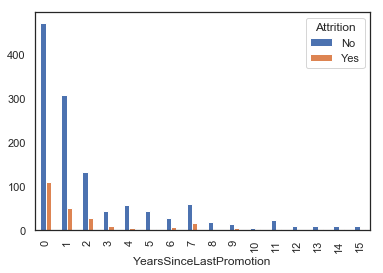

In [256]:
temp8 = pd.crosstab(df['YearsSinceLastPromotion'], df['Attrition'])
temp8.plot(kind='bar')
print(df.groupby(['YearsSinceLastPromotion']).size()/len(df)*100)

In [257]:
print("Number of Years since last promotion varies from {} to {} years.".format(
    df['YearsSinceLastPromotion'].min(), df['YearsSinceLastPromotion'].max()))

Number of Years since last promotion varies from 0 to 15 years.


BusinessTravel
Non-Travel           10.204082
Travel_Frequently    18.843537
Travel_Rarely        70.952381
dtype: float64


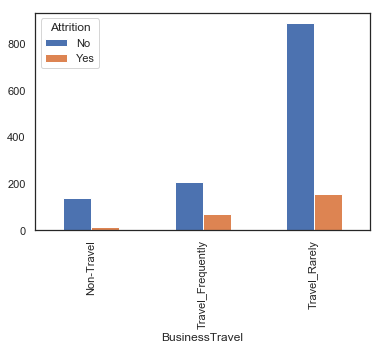

In [258]:
temp9 = pd.crosstab(df['BusinessTravel'], df['Attrition'])
temp9.plot(kind='bar')
print(df.groupby(['BusinessTravel']).size()/len(df)*100)

NumCompaniesWorked
0    13.401361
1    35.442177
2     9.931973
3    10.816327
4     9.455782
5     4.285714
6     4.761905
7     5.034014
8     3.333333
9     3.537415
dtype: float64


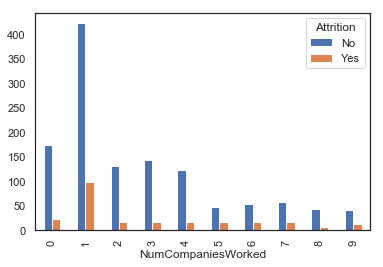

In [259]:
temp10 = pd.crosstab(df['NumCompaniesWorked'], df['Attrition'])
temp10.plot(kind='bar')
print(df.groupby(['NumCompaniesWorked']).size()/len(df)*100)

PerformanceRating
3    84.62585
4    15.37415
dtype: float64


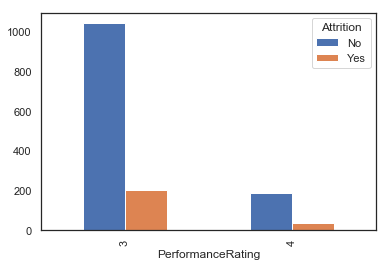

In [260]:
temp12 = pd.crosstab(df['PerformanceRating'], df['Attrition'])
temp12.plot(kind='bar')
print(df.groupby(['PerformanceRating']).size()/len(df)*100)

In [261]:
print("Number of Years in the current role varies from {} to {} years.".format(
    df['YearsInCurrentRole'].min(), df['YearsInCurrentRole'].max()))

Number of Years in the current role varies from 0 to 18 years.


In [262]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df[df['Attrition'] == 'No'].shape[0] / df.shape[0]*100,
    df[df['Attrition'] == 'Yes'].shape[0] / df.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


In [263]:
print('Average Number of Years wit current manager for currently active employees: {:.2f} miles and ex-employees: {:.2f} years'.format(
    df[df['Attrition'] == 'No']['YearsWithCurrManager'].mean(), df[df['Attrition'] == 'Yes']['YearsWithCurrManager'].mean()))

Average Number of Years wit current manager for currently active employees: 4.37 miles and ex-employees: 2.85 years


In [264]:
print("Employee Hourly Rate varies from ${} to ${}.".format(
    df['HourlyRate'].min(), df['HourlyRate'].max()))

Employee Hourly Rate varies from $30 to $100.


In [265]:
print("Normalised percentage of leavers by Stock Option Level: 1: {:.2f}%, 2: {:.2f}%, 3: {:.2f}%".format(
    df[(df['Attrition'] == 'Yes') & (df['StockOptionLevel'] == 1)
          ].shape[0] / df[df['StockOptionLevel'] == 1].shape[0]*100,
    df[(df['Attrition'] == 'Yes') & (df['StockOptionLevel'] == 2)
          ].shape[0] / df[df['StockOptionLevel'] == 1].shape[0]*100,
    df[(df['Attrition'] == 'Yes') & (df['StockOptionLevel'] == 3)].shape[0] / df[df['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 1: 9.40%, 2: 2.01%, 3: 2.52%


Attrition
No     83.877551
Yes    16.122449
dtype: float64


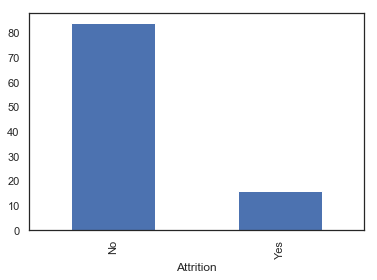

In [266]:
# To check for Target variable distribution
count = df.groupby('Attrition').size()
percent = count/len(df)*100
percent.plot(kind='bar')
print(percent)

In the  dataset, the percentage of Current Employees is 83.9% and of Ex-employees is 16.1%. Hence, this is an imbalanced class problem. Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. 

We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

# Correlation Matrix and Heat Map
Lets now deploy the target variable with the others to see what kind of correlation they hold

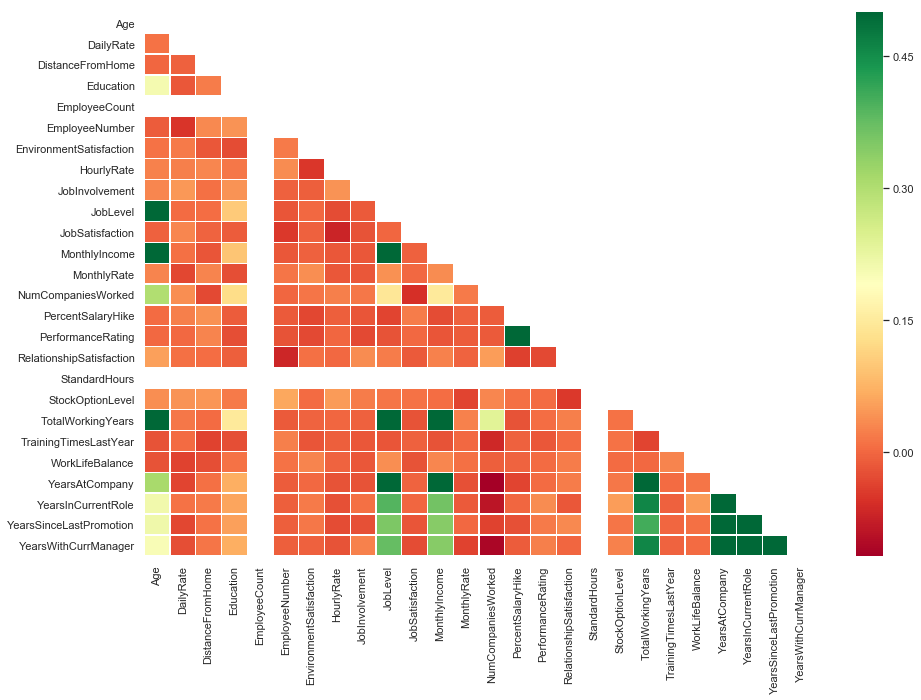

In [267]:
# Calculate correlations
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="RdYlGn")

"Monthly Rate", "Number of Companies Worked" and "Distance From Home" are positively correlated to Attrition;
while "Total Working Years", "Job Level", and "Years In Current Role" are negatively correlated to Attrition.

# EDA Concluding Remarks
Let's summarise the findings from this EDA:

>The dataset does not feature any missing or erroneous data values, and all features are of the correct data type.
The strongest positive correlations with the target features are: Performance Rating, Monthly Rate, Num Companies Worked, Distance From Home.
The strongest negative correlations with the target features are: Total Working Years, Job Level, Years In Current Role, and Monthly Income.
The dataset is imbalanced with the majoriy of observations describing Currently Active Employees.
Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18.
Other observations include:

Employees who are unmarried  show the largest proportion of leavers, compared to Married and Divorced

Loyal employees with higher salaries and more responsbilities show lower proportion of leavers compared to the rest

People who travel frequently show higher proportion of leavers compared to the rest

People who have to work overtime show higher proportion of leavers compared to the rest

Employees that have already worked at several companies previously show higher proportion of leavers compared to the rest

# Model Building and Evaluation

In [268]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [269]:
print(df.shape)
df.head()

(1470, 36)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_category
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,In their 40s
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,In their 40s
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,In their 30s
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,In their 30s
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,In their 20s


In [270]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [271]:
# convert rest of categorical variable into dummy
df = pd.get_dummies(df, drop_first=True)

In [272]:
df.shape

(1470, 53)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 53 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int32
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeCount                        1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
Gender                               1470 non-null int32
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1

> The resulting dataframe has **53 columns** for 1,470 employees.

In [274]:
#Feature scaling 
# Normalizing continuous variables using minmax scalar
from sklearn.preprocessing import MinMaxScaler
#scaling in range between 0 and 5
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['Attrition'] = pd.to_numeric(df['Attrition'], downcast='float')
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,age_category_In their 30s,age_category_In their 40s,age_category_In their 50s,age_category_In their 60s
0,2.738095,1.0,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,3.333333,1.25,5.000000,1.312270,3.490263,4.444444,0.0,5.0,0.000000,0.0,0.000000,0.0,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0
1,3.690476,0.0,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,1.666667,1.25,1.666667,1.085045,4.580004,0.555556,0.0,0.0,4.285714,5.0,5.000000,0.0,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,1.666667,0.00,3.333333,0.284623,0.060630,3.333333,0.0,5.0,1.428571,0.0,1.666667,0.0,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0
3,1.785714,0.0,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,3.333333,0.00,3.333333,0.500263,4.229070,0.555556,0.0,5.0,0.000000,0.0,3.333333,0.0,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,3.333333,0.00,1.666667,0.647446,2.918691,5.000000,0.0,0.0,0.357143,0.0,5.000000,0.0,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0


In [275]:
#Splitting the data into test and train split
target = df['Attrition'].copy()

In [276]:
# let's remove the target feature and redundant features from the dataset
df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df.shape))

Size of Full dataset is: (1470, 48)


In [277]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1029, 48)
Number transactions y_train dataset:  (1029,)
Number transactions X_test dataset:  (441, 48)
Number transactions y_test dataset:  (441,)


### Building Model pieline and validation

In [278]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [279]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,81.21,4.85,76.09,4.31
1,Random Forest,79.39,4.43,85.62,2.52
2,SVM,77.28,4.41,84.36,3.16
5,Gaussian NB,74.21,4.36,30.41,6.50
3,KNN,68.32,5.14,84.45,2.12
4,Decision Tree Classifier,64.85,6.45,81.05,3.79


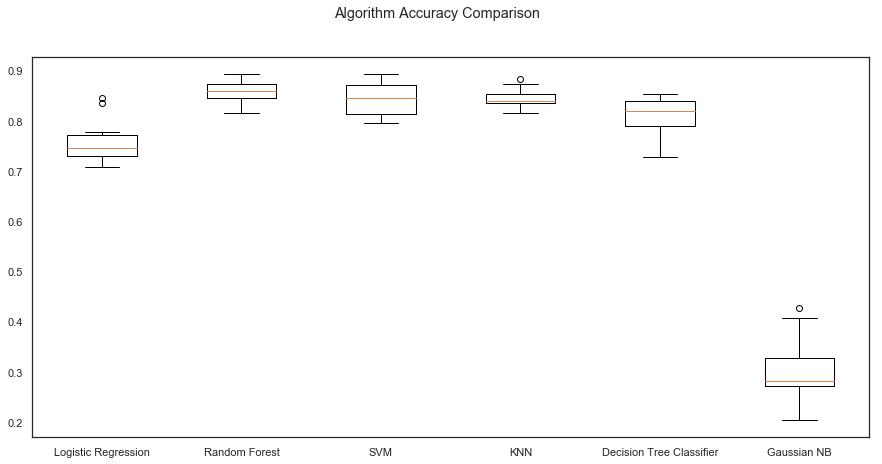

In [280]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

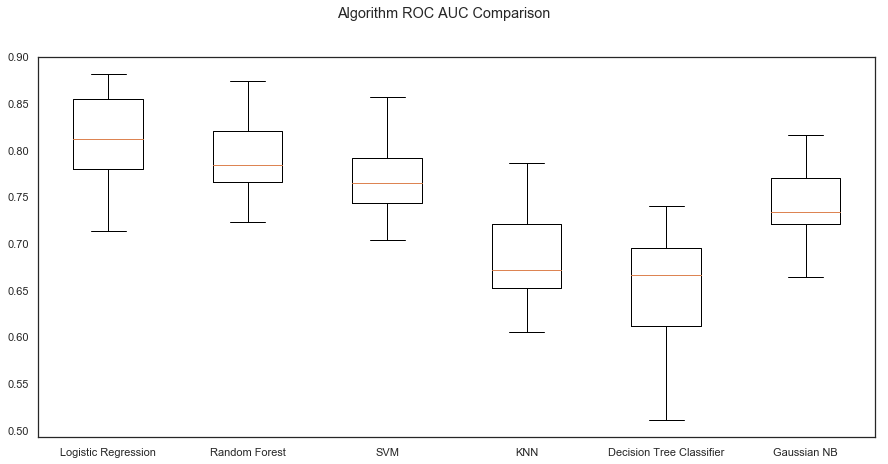

In [281]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

Random Forst and Logistic Regression are the models that gives the two highest accuracies under ROC AUC curver

# Lets analyse Logistic regression first

K can be any number, but K=10 is generally recommended
This has been shown experimentally to produce the best out-of-sample estimate

In [282]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.81 (0.05)


In [283]:
#Gridserch CV for fine tuning the hyper parameters
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear',
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=0.030999999999999996, class_weight='balanced',
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
          random_state=7, solver='liblinear', tol=0.0001, verbose=0,
          warm_start=False)
best params: {'C': 0.030999999999999996}
best score: 0.8204396156828332


Text(0.5, 257.44, 'Predicted label')

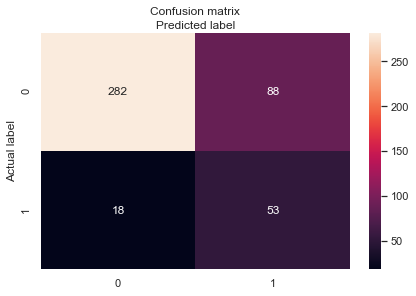

In [284]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

there are  335 correct predictions and 106 incorrect predictions

In [285]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 75.96


In [286]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.94      0.76      0.84       370
         1.0       0.38      0.75      0.50        71

   micro avg       0.76      0.76      0.76       441
   macro avg       0.66      0.75      0.67       441
weighted avg       0.85      0.76      0.79       441



In [287]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.845


better AUC score can be seen post fine tuning

# Random forest classifier

The Random Forest is chosen over other algorithms because it uses the entire dataset optimally which reduces bias error. The algorithm is also famous for providing maximum reduction in variance as it gives the average output from an ensemble of several decision trees; hence the name ‘Random Forest’.

**N_estimators
n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data
**max_depth
max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data.

In [288]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=75, n_jobs=None, oob_score=False, random_state=7,
            verbose=0, warm_start=False)
best params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 75}
best score: 0.805317734647225


### Lets look for the important features that will help in understanding the parameters better. These factors will directly impact the Succsession planning as well

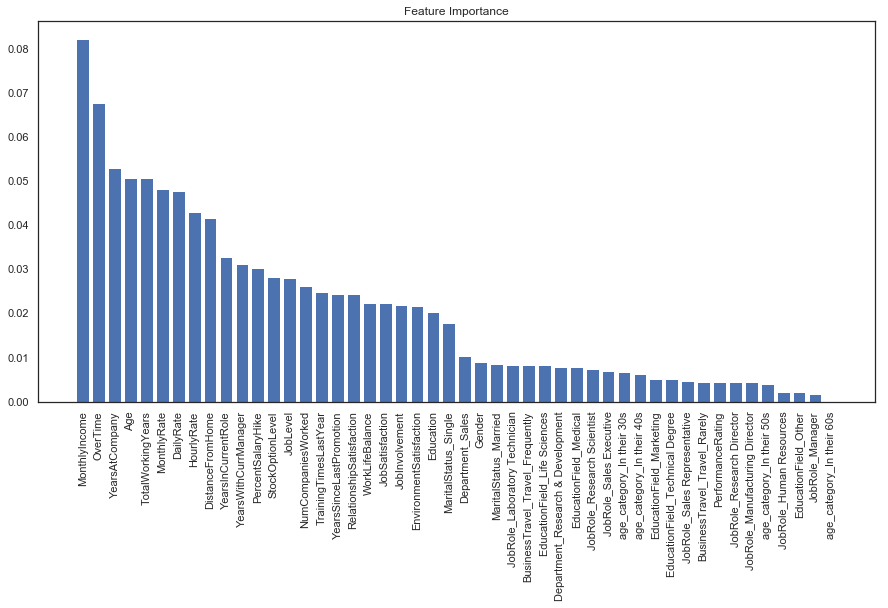

In [297]:
#feature importance
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

# featimp = pd.DataFrame(data = rf_opt.feature_importances_*100.0 , columns = ["GiniValue"])
# featimp.sort_values([GiniValue], axis=0, ascending=False,inpace= True)
# print(featimp.head())

Top 10 most important indicators are as follows:

MonthlyIncome,
OverTime, Age, MonthlyRate,
DistanceFromHome, DailyRate, TotalWorkingYears,
YearsAtCompany, HourlyRate, YearsWithCurrManager.

### We can also do feature importance analysis where we can choose a different target variable like  "Performance Rating". In the current problem we are predicting the attrition variable and as I have less time, I could have also chosen a dataset where the target variable is "Performance Rating" or  Once getting the top attributes that are matced to Performance, the same can be categorised into the Nine box succession planning grid to see if the talent is worth eing a successor

Text(0.5, 257.44, 'Predicted label')

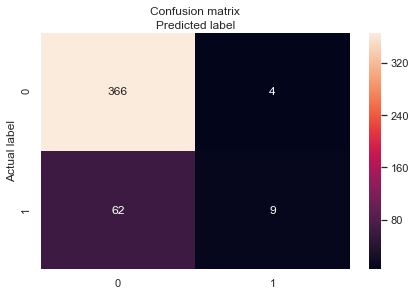

In [290]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [291]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

Accuracy of RandomForest Regression Classifier on test set: 85.03


In [292]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       370
         1.0       0.69      0.13      0.21        71

   micro avg       0.85      0.85      0.85       441
   macro avg       0.77      0.56      0.57       441
weighted avg       0.83      0.85      0.80       441



In [293]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.785


## ROC Curve
in simple terms, an ROC curve gives the performance of a classification prolem. The classifiers that we have used should stay as far away as possible on the left side of the green line

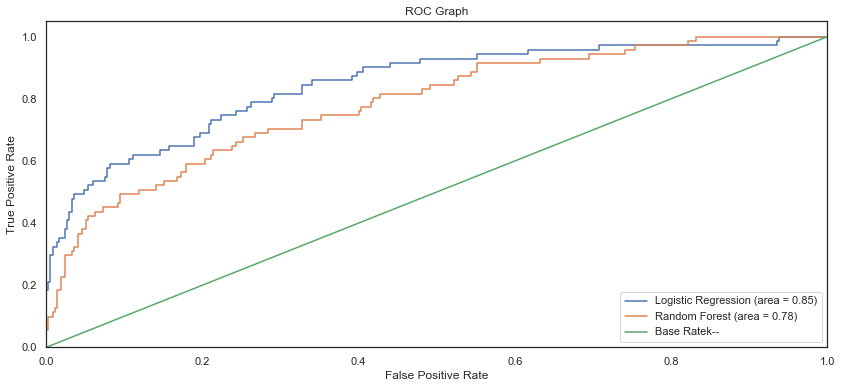

In [294]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

The above graph shows that a fine tuned logistic regression model is better that the random forest classifier though random forst classifer was able to give the most important features with the target variable